In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
original_df = pd.read_excel('data (1).xlsx')
original_df.shape

(58596, 57)

In [ ]:
pip uninstall torch

In [3]:
df = original_df.copy()
df.shape

(58596, 57)

In [4]:
import pandas as pd

def select_every_nth_row(df, n=1000):
    """
    Select every nth row from a DataFrame.

    Parameters:
    - df: The input DataFrame.
    - n: The interval for row selection (default is 1000).

    Returns:
    - A new DataFrame containing every nth row from the input DataFrame.
    """
    selected_rows = df.iloc[::n]
    return selected_rows

# Example usage:
# Assuming df is your DataFrame with shape (58596, 57)
selected_rows = select_every_nth_row(df, n=1000)

# Now, selected_rows contains the rows at the specified indices
#selected_rows

In [5]:
for column in df.columns:
    if df[column].nunique() == 1:
        print(f"All values in {column} are identical.")

All values in pslist.nprocs64bit are identical.
All values in handles.nport are identical.
All values in svcscan.interactive_process_services are identical.


In [6]:
# drop identical columns
# List of columns to drop
columns_to_drop = ['pslist.nprocs64bit', 'handles.nport', 'svcscan.interactive_process_services']

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)

In [7]:
import pandas as pd
from scipy.stats import zscore

# Print the number of missing values
print("Number of Missing Values:")
print(df.isnull().sum())

# Print the number of duplicate rows
print("\nNumber of Duplicate Rows:", df.duplicated().sum())

# Handling Missing Values
df.fillna(method="ffill", inplace=True)  # Forward fill missing values

# Removing Duplicates
df.drop_duplicates(inplace=True)

# Data Type Conversion
# df["Class"] = df["Class"].astype("category")

#Outlier Handling (Example: Using Z-score)
# z_scores = zscore(df.select_dtypes(include=['int64', 'float64']))
# df = df[(z_scores < 3).all(axis=1)]

# Handling Categorical Data (One-Hot Encoding)
df = pd.get_dummies(df, columns=["Class"], drop_first=True)

# Feature Scaling (Min-Max Scaling)
# df[df.select_dtypes(include=['int64', 'float64']).columns] = \
#     (df[df.select_dtypes(include=['int64', 'float64']).columns] - df[df.select_dtypes(include=['int64', 'float64']).columns].min()) / \
#     (df[df.select_dtypes(include=['int64', 'float64']).columns].max() - df[df.select_dtypes(include=['int64', 'float64']).columns].min())

# Removing Unnecessary Columns
# columns_to_remove = ["Column1", "Column2"]  # List of columns to remove
# df.drop(columns=columns_to_remove, inplace=True)

Number of Missing Values:
                                          0
pslist.nproc                              0
pslist.nppid                              0
pslist.avg_threads                        0
pslist.avg_handlers                       0
dlllist.ndlls                             0
dlllist.avg_dlls_per_proc                 0
handles.nhandles                          0
handles.avg_handles_per_proc              0
handles.nfile                             0
handles.nevent                            0
handles.ndesktop                          0
handles.nkey                              0
handles.nthread                           0
handles.ndirectory                        0
handles.nsemaphore                        0
handles.ntimer                            0
handles.nsection                          0
handles.nmutant                           0
ldrmodules.not_in_load                    0
ldrmodules.not_in_init                    0
ldrmodules.not_in_mem                     0
ldrmod

C:\Users\lucif\AppData\Local\Temp\ipykernel_34308\3723490728.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)  # Forward fill missing values


In [8]:
print("\nData Info:")
print(df.info())
print("\nFirst Few Rows:")
print(df.head())


Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 58062 entries, 0 to 58595
Data columns (total 54 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0                                           58062 non-null  object 
 1   pslist.nproc                            58062 non-null  int64  
 2   pslist.nppid                            58062 non-null  int64  
 3   pslist.avg_threads                      58062 non-null  float64
 4   pslist.avg_handlers                     58062 non-null  float64
 5   dlllist.ndlls                           58062 non-null  int64  
 6   dlllist.avg_dlls_per_proc               58062 non-null  float64
 7   handles.nhandles                        58062 non-null  int64  
 8   handles.avg_handles_per_proc            58062 non-null  float64
 9   handles.nfile                           58062 non-null  int64  
 10  handles.nevent                          58062 non-n

In [9]:
print("DataFrame Shape:", df.shape)
print("Class Distribution:", df["Class_Malware"].value_counts())

DataFrame Shape: (58062, 54)
Class Distribution: Class_Malware
False    29231
True     28831
Name: count, dtype: int64


In [10]:
print("Number of Missing Values:")
print(df.isnull().sum())

Number of Missing Values:
                                          0
pslist.nproc                              0
pslist.nppid                              0
pslist.avg_threads                        0
pslist.avg_handlers                       0
dlllist.ndlls                             0
dlllist.avg_dlls_per_proc                 0
handles.nhandles                          0
handles.avg_handles_per_proc              0
handles.nfile                             0
handles.nevent                            0
handles.ndesktop                          0
handles.nkey                              0
handles.nthread                           0
handles.ndirectory                        0
handles.nsemaphore                        0
handles.ntimer                            0
handles.nsection                          0
handles.nmutant                           0
ldrmodules.not_in_load                    0
ldrmodules.not_in_init                    0
ldrmodules.not_in_mem                     0
ldrmod

In [11]:
#feature Extraction
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Separate features and target
y = df["Class_Malware"]
X = df.drop(columns=[ "Class_Malware"])
# Drop the column with a space as the name
X = X.drop(columns=[' '])


In [12]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

 #Standardize your features (recommended before PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

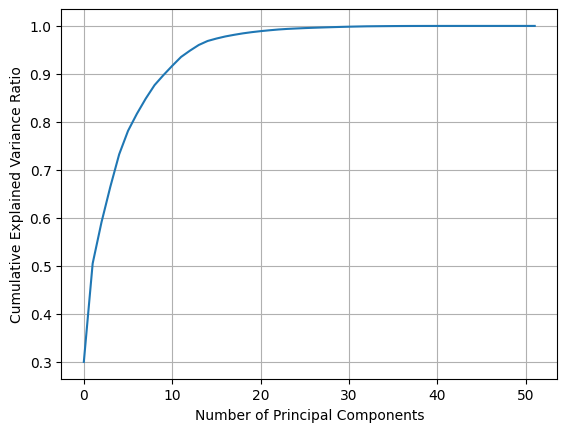

In [14]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_

# Plot cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [15]:
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"Number of components to retain for 95% variance: {n_components}")

# Now you can perform PCA with the selected number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

Number of components to retain for 95% variance: 14


In [16]:
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance_ratio)

Explained Variance Ratios: [0.2992114  0.20532268 0.08612395 0.0740518  0.06758696 0.04885194
 0.03550966 0.03168342 0.02818314 0.02078047 0.01949954 0.01851886
 0.0130553  0.01187193]


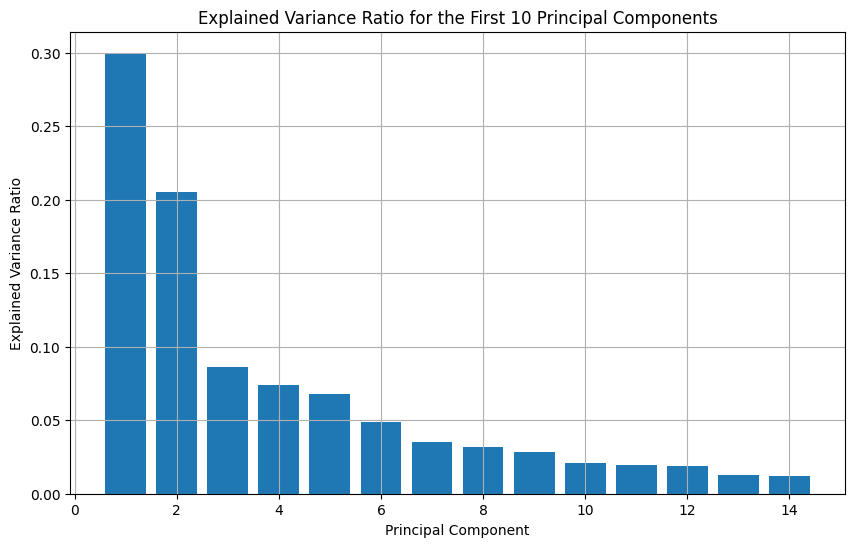

In [26]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for the First 10 Principal Components')
plt.grid(True)
plt.show()

In [21]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_pca)
print(X_tsne)

c:\Users\lucif\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\lucif\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


[[ -41.685467    17.855772 ]
 [  28.935036    54.608456 ]
 [   9.542496   -17.226416 ]
 ...
 [ -73.61117     -5.091543 ]
 [ -60.94472    -89.65706  ]
 [-121.20932      7.7032013]]


In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# # Feature extraction using LDA
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

In [31]:
X_lda

array([[ 3.72722886],
       [-1.09992324],
       [-8.27460227],
       ...,
       [ 4.15349867],
       [ 4.42348741],
       [ 4.20224889]])

In [22]:
print(df["Class_Malware"].unique())

[False  True]


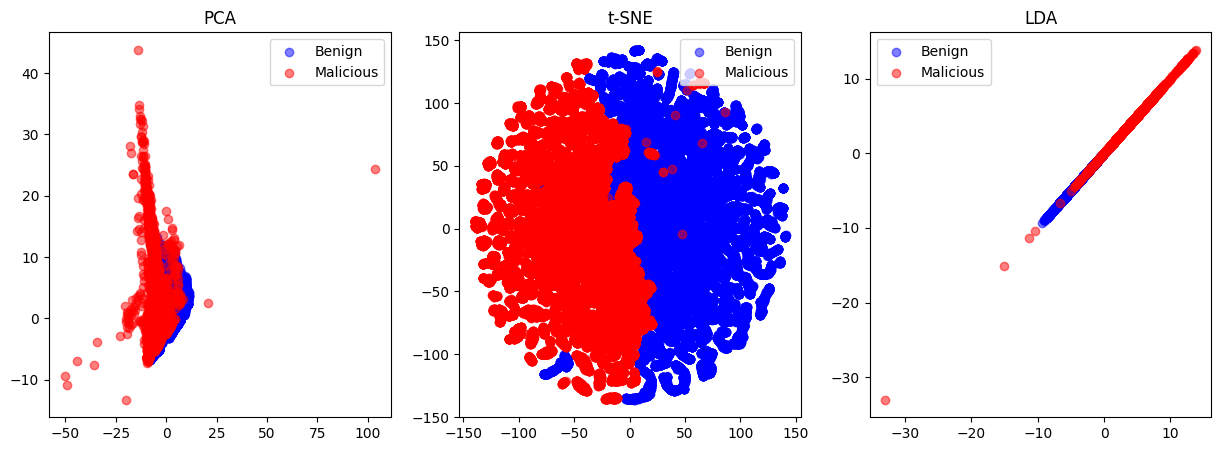

In [24]:
import matplotlib.pyplot as plt

# Create subplots for side-by-side comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot PCA
axes[0].scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], label="Benign", color="blue", alpha=0.5)
axes[0].scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], label="Malicious", color="red", alpha=0.5)
axes[0].set_title("PCA")
axes[0].legend()

# Plot LDA
axes[2].scatter(X_lda[y == 0, 0], X_lda[y == 0, 0], label="Benign", color="blue", alpha=0.5)
axes[2].scatter(X_lda[y == 1, 0], X_lda[y == 1, 0], label="Malicious", color="red", alpha=0.5)
axes[2].set_title("LDA")
axes[2].legend()

# Plot t-SNE
axes[1].scatter(X_tsne[y == 0, 0], X_tsne[y == 0, 1], label="Benign", color="blue", alpha=0.5)
axes[1].scatter(X_tsne[y == 1, 0], X_tsne[y == 1, 1], label="Malicious", color="red", alpha=0.5)
axes[1].set_title("t-SNE")
axes[1].legend()



plt.show()

In [35]:
#xg boost train an initial xg boost model

In [25]:
# Import necessary libraries
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

# XGBoost for Feature Extraction
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Use the trained XGBoost model to get feature importances
feature_importances = xgb_model.feature_importances_

# Select the top N important features
N = 14  # Change this value based on the number of features you want to select
selected_feature_indices = np.argsort(feature_importances)[::-1][:N]
selected_features = X.columns[selected_feature_indices]

# Subset the dataset with the selected features
X_train_selected = X_train.iloc[:, selected_feature_indices]
X_test_selected = X_test.iloc[:, selected_feature_indices]

# Normalize the data
scaler = StandardScaler()
X_train_selected = scaler.fit_transform(X_train_selected)
X_test_selected = scaler.transform(X_test_selected)

In [38]:
#feature importance scores

In [26]:
# Import necessary libraries
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

# XGBoost for Feature Extraction
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Use the trained XGBoost model to get feature importances
feature_importances = xgb_model.feature_importances_

# Select the top N important features
N = 14  # Change this value based on the number of features you want to select
selected_feature_indices = np.argsort(feature_importances)[::-1][:N]
selected_features = X.columns[selected_feature_indices]

# Subset the dataset with the selected features
X_train_selected = X_train.iloc[:, selected_feature_indices]
X_test_selected = X_test.iloc[:, selected_feature_indices]

# Normalize the data
scaler = StandardScaler()
X_train_selected = scaler.fit_transform(X_train_selected)
X_test_selected = scaler.transform(X_test_selected)

In [41]:
#sorting and visualising important features

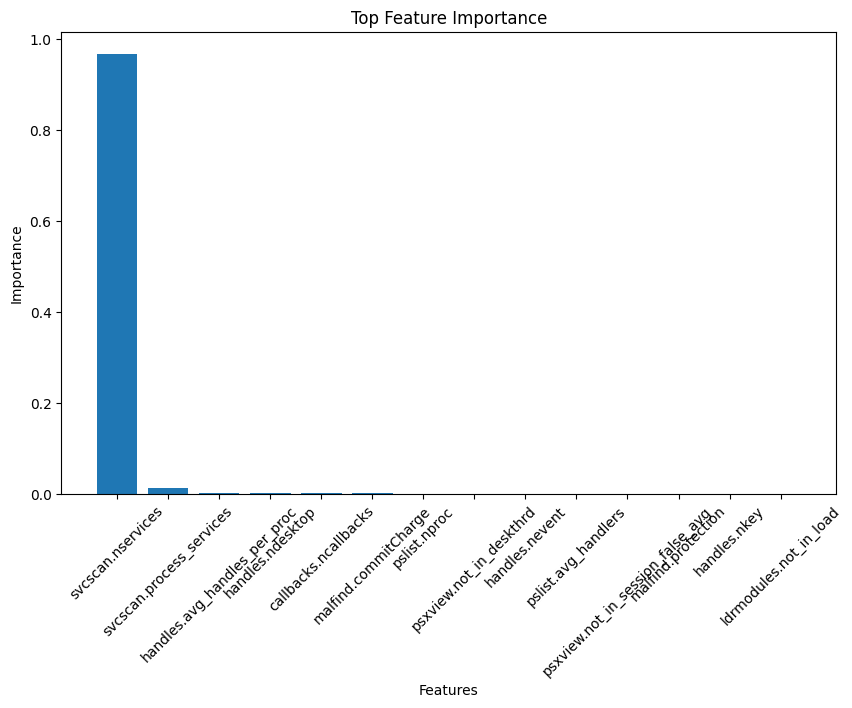

In [40]:

N = 14  # Number of top features to select
sorted_indices = np.argsort(feature_importances)[::-1]
selected_features = X.columns[sorted_indices[:N]]

plt.figure(figsize=(10, 6))
plt.bar(selected_features, feature_importances[sorted_indices[:N]])
plt.title('Top Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

In [42]:
#deep learinig rnn

In [27]:
import torch

# Split the data into training and testing sets
# X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X_train_selected, y_train_encoded, test_size=0.2, random_state=42)

# Convert the data to PyTorch tensors
X_train_tensor = torch.from_numpy(X_train_selected).float()
y_train_tensor = torch.from_numpy(y_train.values).long()
X_test_tensor = torch.from_numpy(X_test_selected ).float()
y_test_tensor = torch.from_numpy(y_test.values).long()

# Print the shapes of the tensors
print("X_train_tensor shape:", X_train_tensor.shape)
print("y_train_tensor shape:", y_train_tensor.shape)
print("X_test_tensor shape:", X_test_tensor.shape)
print("y_test_tensor shape:", y_test_tensor.shape)

X_train_tensor shape: torch.Size([40643, 14])
y_train_tensor shape: torch.Size([40643])
X_test_tensor shape: torch.Size([17419, 14])
y_test_tensor shape: torch.Size([17419])


In [71]:
X_train_tensor = torch.from_numpy(X_train_selected).float()
print("X_train_tensor shape:", X_train_tensor.shape)


AttributeError: module 'torch' has no attribute 'from_numpy'

In [72]:
import sys
print(sys.executable)


c:\Users\lucif\AppData\Local\Programs\Python\Python312\python.exe


In [74]:
import torch
print(torch.__version__)


AttributeError: module 'torch' has no attribute '__version__'

In [78]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())  # Checks if CUDA (GPU support) is available


AttributeError: module 'torch' has no attribute '__version__'